# Team members: 
-Bishal Sainju<br>
-Victor Lee<br>
-Supratik Chanda<br>

# Introduction:
This dataset consists of 3150 Amazon customer reviews(input text), ratings(1-5), date of review, 
variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.
for learning how to train machine for sentiment analysis(or better awesomeness analysis). We use this data to 
analyze Amazon’s Alexa product, discover insights into consumer reviews and assist with machine learning models.<br>

At first we thought of analyzing the sentiment of the customer reviews, but after analyzing data further, we found out that our data was biased towards positive sentiments, so whatever paraemters we chose, we wouldn't be able to 
create unbiased model. <br>

Hence we decided to predict if the review is 'awesome' or 'not so awesome'. We basically assumed that if the user rating is 5 stars than, the review is awesome, and 'not so awesome', otherwise. <br>

# Dataset and Analyses:
1) First of all we checked to see if there was null value or not. There wasn't any, so it wasn't a problem.<br>
2) We then went on to analyze the data. First we created a bar plot of no. of ratings in each feedback. We figured out<br>
that if feedback was 1 it had rating 4 or 5 and if it was 0, it had rating 1, 2, or 3. <br>
<img src="img/awsm/1.png"><br>
We can see that the dataset is hugely biased towards feedback 1, or in our analysis, we call it positive sentiment. 
So, we are pretty confident that whatever model we fit, the model will always be positive biased. Whatever new 
instances it gets it will try to predict it as a positive sentiment, which is not a correct represantion at all. 
So, instead of labeling the reviews as positive or negative sentiments, what we have decided to do is, 
we decided to plot a bar graph of no. of datasets that we have for each ratings.<br>
3) We plotted bar graph of no. of records in each rating. <br> 
<img src="img/awsm/2.png"><br>
We see that there are many rating 5, so our dataset is always going to be biased towards rating '5'.
However, what we can do is the divide the dataset into awesome reviews meaning rating '5' reviews vs not
so awesome reviews. This is still biased but we reduce the bias to some extent. <br>
At least we can check to see if our KNN model can perform well or not, for differentiating between 'awesome'
and 'not so awesome' reviews or not. We expect that it will have hard time figuring this out but let's see if
tuning in our model with appropriate parameters can do any help. <br>
3) We had 2286 awesome reviews and 886 not awesome. So, we made another column 'awesome' with values 1 and 0. <br>
4) Now, we went on to see if any other attributes has any significance in awesomeness of reviews. <br>
<img src='img/awsm/3.png'><br>
It seems like there's not much correlation in the other variables. So, we conclude that, only review text determines
awesomeness of the reviews. So, we neglect other attributes for the further analyses.<br>

# Machine Learning Preprocessing Steps:
#### Data Preprocessing:
We used NLTK package from NLP to preprocess the text used by the user in their reviews:<br>
1) We first lowercased every words in the reviews of each customer.<br>
2) Then, we tokenized each words. <br>
3) Then, we removed the stopwords. <br>
4) Then, we stemmed every words for efficiency in further analysis. <br>
5) Then, we joined the words that we processed back for a user.<br>
6) We collect all these preprocessed words for each user in corpus.<br>

#### Feature Extraction:
We then extracted the feature using tf-idf vectorizer, and also created a tf-idf matrix for 500 relevant features, in 
the bag of words collection. <br>

#### Train Model:
We then created KNN training model, and splitted our dataset into train and test sets, and then fed the train set to 
the model and trained our model on it, and then tested its performance on test set. <br>

# Results:
#### Performance Evaluation:
We then used various metrics to evaluate its performance. 
We obtained following result:<br>
Confusion Matrix:<br>
<img src="img/awsm/7.png"><br>
    
Classification Report: <br>
<img src="img/awsm/8.png"><br>

#### Best Model:
We then used grid search to figure out the best parameters for our model. And we obtained the following result:<br>
    {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'jaccard', 'n_neighbors': 10, 'weights': 'distance'}<br>

We obtained the f1-score of 0.9031 for this. <br>
Cross validation, confusion matrix and scores for one of the folds of 10-fold cross validation is shown below:<br>
<img src="img/awsm/9.png"><br>
    
# Conclusion:   
1) So, we have got a pretty decent model than what we were expecting. <br>
2) We have only used tf-idf vectorizer only, we could try our model using other feature extractor line, count vectorizer, binary vectorizer and so on. <br>
3) Our model chose jaccard metric to be the best estimator, maybe because jaccard works better for sparse datasets. <br>
4) We have just tried our model on 2 values of k-neighbors [5, 10] due to time constrain, we could try it on various ranges of K as well. <br>
5) We could add more data preprocessing to further refine our texts(like lemmatization, dictionary comparision, POS removal) <br>
6) Similarly, we have used 500 best features, we could further use PCA or we could play with this parameter as well. We haven't had enough time for doing this. If allowed more time, we can work on this. <br>
7) We tried creating pipeline for trying out different things that we mentioned we couldn't do, but it took a long time to run, so we just left it not completed for now. <br>

In [33]:
import matplotlib.pyplot as plt
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix ,accuracy_score, f1_score, precision_score, recall_score

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif, mutual_info_classif, \
    mutual_info_regression, RFE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline



In [34]:
dataset= pd.read_csv('amazon_alexa.tsv',delimiter='\t',quoting=3)
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [35]:
dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

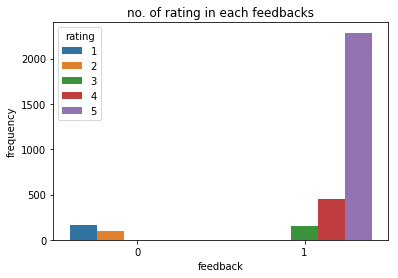

In [36]:
temp = (dataset.groupby(['feedback']))['rating'].value_counts()\
.reset_index(name = "frequency")
sns.barplot(x = "feedback", y = "frequency", hue = "rating", data = temp)\
.set_title("no. of rating in each feedbacks")
plt.savefig('1.png')

We can see that the dataset is hugely biased towards feedback 1, or in our analysis, we call it positive sentiment. So, we are pretty confident that whatever model we fit, the model will always be positive biased. Whatever new instances it gets it will try to predict it as a positive sentiment, which is not a correct represantion at all. <br>
So, instead of labeling the reviews as positive or negative sentiments, what we have decided to do is, lets plot a bar graph of no. of datasets that we have for each ratings. 

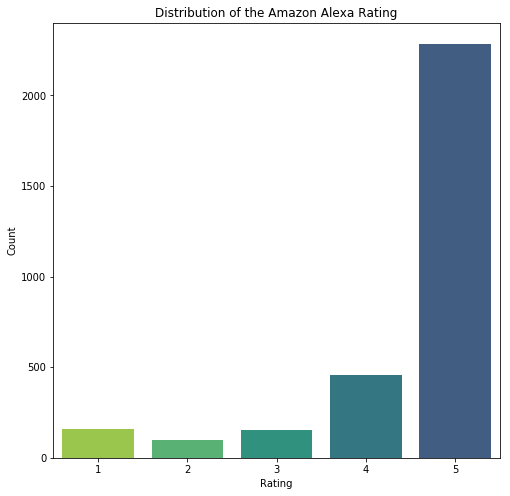

In [37]:
plt.figure(figsize=(8,8))
ax=sns.countplot(dataset['rating'],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Distribution of the Amazon Alexa Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
plt.savefig('2.png')

In [38]:
dataset.groupby(['rating'])['rating'].count()

rating
1     161
2      96
3     152
4     455
5    2286
Name: rating, dtype: int64

We see that there are many rating 5, so our dataset is always going to be biased towards rating '5'. However, what we can do is the divide the dataset into awesome reviews meaning rating '5' reviews vs not so awesome reviews. This is still biased but we reduce the bias to some extent. <br>
At least we can check to see if our KNN model can perform well or not, for differentiating between 'awesome' and 'not so awesome' reviews or not. We expect that it will have hard time figuring this out but let's see if tuning in our model with appropriate parameters can do any help. 

In [39]:
dataset.groupby('rating').count()
dataset['awesome'] = 0
dataset.loc[dataset['rating'] ==5, 'awesome'] = 1

y = dataset['awesome'].values
dataset.groupby(['awesome'])['awesome'].count()


awesome
0     864
1    2286
Name: awesome, dtype: int64

In [40]:
dataset.shape

(3150, 6)

Let's look at other features other than the review comments. <br>
Let's look at variations. (Does any variation have more positive feedback over others?)

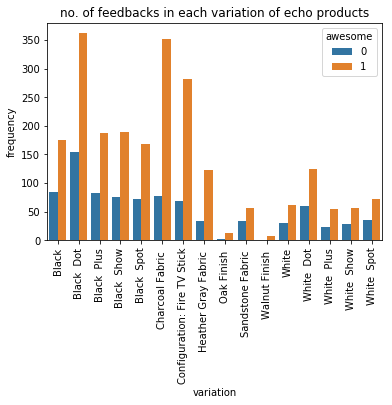

In [61]:
temp = (dataset.groupby(['variation']))['awesome'].value_counts()\
.reset_index(name = "frequency")
sns.barplot(x = "variation", y = "frequency", hue = "awesome", data = temp)\
.set_title("no. of feedbacks in each variation of echo products")
plt.xticks(rotation = 90)
plt.savefig('3.png')
plt.show()

We don't think variation has much information in prediction whether the review is awesome or not. <br>
We can drop date column and variations column, since they don't provide much information for further analysis. <br>
Now, let's consider only the text used verified_reviews columns, and based on the text used in that we can predict whether those feedbacks were awesome or not. <br>
So, for that we did some data preprocessing so that, we can get bag of words collections, which we can use to for tf-idf matrix for each record. 

In [42]:
corpus = []
for i in range(0, 3150):
    # column : "verified_reviews", row ith 
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'][i])
    # convert all cases to lower cases 
    review = review.lower()
    # split to array(default delimiter is " ") 
    review = review.split()
    # creating PorterStemmer object to 
    # take main stem of each word
    ps = PorterStemmer()
    # loop for stemming each word 
    # in string array at ith row 
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)
    # append each string to create 
    # array of clean text  
    corpus.append(review)

In [43]:
corpus[2]

'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home'

In [44]:
dataset['verified_reviews'][2]

'"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home."'

Let's use tf-idf vectorizer to creat a bag of word collection. 
And vectorize each record into tf-idf values

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)
print(X)

['abil', 'abl', 'absolut', 'access', 'account', 'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'advertis', 'alarm', 'alexa', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz', 'amazon', 'annoy', 'anoth', 'answer', 'anyth', 'app', 'appl', 'around', 'ask', 'assist', 'audibl', 'audio', 'avail', 'away', 'awesom', 'back', 'bad', 'base', 'basic', 'bass', 'batteri', 'bed', 'bedroom', 'bedsid', 'begin', 'best', 'better', 'big', 'birthday', 'bit', 'blue', 'bluetooth', 'book', 'bose', 'bought', 'brand', 'brief', 'built', 'bulb', 'button', 'buy', 'cabl', 'call', 'came', 'camera', 'cannot', 'capabl', 'cell', 'chang', 'channel', 'chat', 'check', 'clear', 'clock', 'color', 'come', 'command', 'commun', 'complaint', 'complet', 'comput', 'connect', 'consid', 'constantli', 'contact', 'continu', 'control', 'conveni', 'cook', 'cool', 'cord', 'cost', 'could', 'coupl', 'creat', 'current', 'custom', 'daili', 'daughter', 'day', 'deal', 'decid', 'definit', 'deliv', 'design',

In [46]:
###Creating the bag of words model
X = X.toarray()
# y = dataset['awesome'].values

X.shape

(3150, 500)

Now, we built a simple knn model with default parameters to check if everything is going well. 

In [47]:
##Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [48]:
# classifier = KNeighborsClassifier(metric='jaccard')
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

In [50]:
###predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [51]:
##Making the Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 96,  77],
       [118, 339]])

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.55      0.50       173
           1       0.81      0.74      0.78       457

   micro avg       0.69      0.69      0.69       630
   macro avg       0.63      0.65      0.64       630
weighted avg       0.71      0.69      0.70       630



It seems like everything is going well. We can see that we have obtained f1-score of around .70ish <br>
Now, let's find the best estimates and best parameters, by feeding this into gridsearchCV. 

In [53]:
params = dict(n_neighbors=[5, 10],weights=['uniform', 'distance'],algorithm=['auto'],\
              leaf_size=[30], metric=['euclidean', 'jaccard'])

grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=10,n_jobs=-1,scoring='f1')
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'jaccard', 'n_neighbors': 10, 'weights': 'distance'}
0.9031151225997964


Let's build classification report and confusion matrix to get some insight into our model. 

In [54]:
def scores(y_true, y_pred):
    print (classification_report(y_true, y_pred))
    print (confusion_matrix(y_true, y_pred))
    print ('acc:{}, prec:{}, recall:{}, f1:{}\n\n'.format(accuracy_score(y_true, y_pred), \
                                                      precision_score(y_true, y_pred), 
                                                      recall_score(y_true, y_pred), 
                                                      f1_score(y_true, y_pred)))
    return f1_score(y_true, y_pred)


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
knn_final = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='jaccard', algorithm='auto', leaf_size=30)
cv_scores = cross_val_score(knn_final, X, y, cv=10, scoring=make_scorer(scores))
print(np.mean(cv_scores).round(4))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88        87
           1       0.94      0.98      0.96       229

   micro avg       0.94      0.94      0.94       316
   macro avg       0.94      0.91      0.92       316
weighted avg       0.94      0.94      0.94       316

[[ 73  14]
 [  5 224]]
acc:0.939873417721519, prec:0.9411764705882353, recall:0.9781659388646288, f1:0.9593147751605996


              precision    recall  f1-score   support

           0       0.67      0.21      0.32        87
           1       0.76      0.96      0.85       229

   micro avg       0.75      0.75      0.75       316
   macro avg       0.71      0.58      0.58       316
weighted avg       0.74      0.75      0.70       316

[[ 18  69]
 [  9 220]]
acc:0.7531645569620253, prec:0.7612456747404844, recall:0.9606986899563319, f1:0.8494208494208493


              precision    recall  f1-score   support

           0       0.96      0.80      0.88   